# **Cluster Analysis Notebook**

### Objectives
* Fit and evaluate a cluster model to group similar data
* Understand the profile for each cluster

### Inputs
* General Dataset: outputs/datasets/collection/BreakfastSurvey.csv
* Instructions on which variables to use for data cleaning and feature engineering. They are found in their respective notebooks.

### Outputs
* Cluster Pipeline
* Train Set
* Most important features to define a cluster plot
* Cluster Profile Description
* Cluster Silhoulette

---

## Change working directory
We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [22]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Guest-Survey-Analysis-to-Improve-Hotel-Breakfast'

We want to make the parent of the current directory the new current directory.
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [23]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [24]:
current_dir = os.getcwd()
current_dir

'/workspaces'

---

## Load Data

In [25]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/BreakfastSurvey.csv")
    .drop("breakfast", axis=1)
)
df.head(3)

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/datasets/collection/BreakfastSurvey.csv'

## Cluster Pipeline with data

### ML Cluster Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from feature_engine.selection import SmartCorrelatedSelection

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

def PipelineCluster():
    pipeline_base = Pipeline([

        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None, method="spearman",
                                                              threshold=0.9, selection_method="variance")),

        ("scaler", StandardScaler()),

        ("PCA", PCA(n_components=50, random_state=0)),

        ("model", KMeans(n_clusters=50, random_state=0)),

    ])
    return pipeline_base

### Principal Component Analysis (PCA)

In [ ]:
pipeline_cluster = PipelineCluster()
pipeline_pca = Pipeline(pipeline_cluster.steps[:-2])
df_pca = pipeline_pca.fit_transform(df)

print(df_pca.shape,'\n', type(df_pca))

(27947, 4) 
 <class 'numpy.ndarray'>


Apply PCA separately to the scaled data

* The 4 components explain 100.0% of the data 



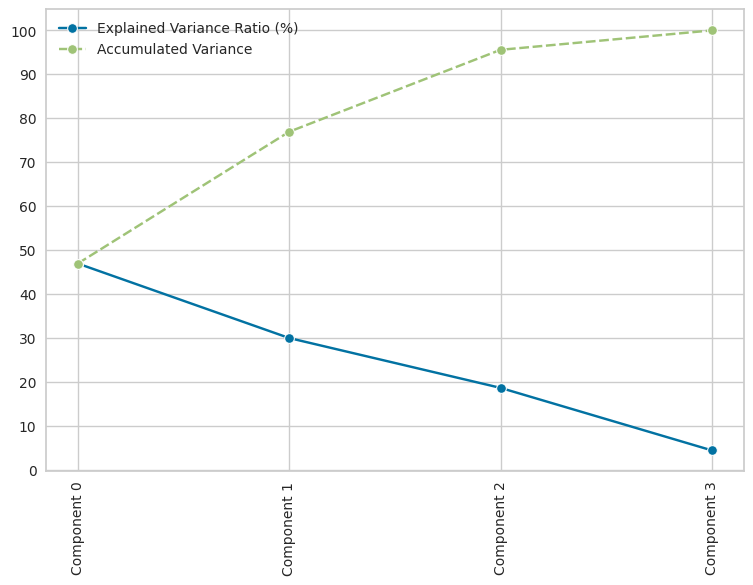

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

n_components = 4

def pca_components_analysis(df_pca, n_components):
    pca = PCA(n_components=n_components).fit(df_pca)
    x_PCA = pca.transform(df_pca)

    ComponentsList = ["Component " + str(number)
                      for number in range(n_components)]
    dfExplVarRatio = pd.DataFrame(
        data=np.round(100 * pca.explained_variance_ratio_, 3),
        index=ComponentsList,
        columns=['Explained Variance Ratio (%)'])

    dfExplVarRatio['Accumulated Variance'] = dfExplVarRatio['Explained Variance Ratio (%)'].cumsum(
    )

    PercentageOfDataExplained = dfExplVarRatio['Explained Variance Ratio (%)'].sum(
    )

    print(
        f"* The {n_components} components explain {round(PercentageOfDataExplained,2)}% of the data \n")
    plt.figure(figsize=(9, 6))
    sns.lineplot(data=dfExplVarRatio,  marker="o")
    plt.xticks(rotation=90)
    plt.yticks(np.arange(0, 110, 10))
    plt.show()


pca_components_analysis(df_pca=df_pca, n_components=n_components)

* The 2 components explain 76.94% of the data 



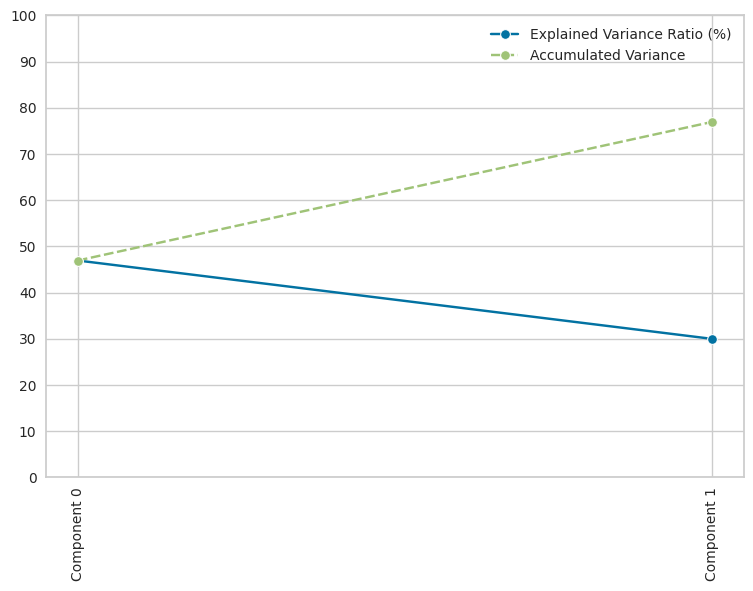

In [28]:
pca_components_analysis(df_pca=df_pca,n_components=2)

In [ ]:
def PipelineCluster():
    pipeline_base = Pipeline([

        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None, method="spearman",
                                                              threshold=0.8, selection_method="variance")),

        ("scaler", StandardScaler()),

        ("PCA", PCA(n_components=2, random_state=0)),

        ("model", KMeans(n_clusters=6, random_state=0)),

    ])
    return pipeline_base

PipelineCluster()

Pipeline(steps=[('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6)),
                ('scaler', StandardScaler()),
                ('PCA', PCA(n_components=2, random_state=0)),
                ('model', KMeans(n_clusters=6, random_state=0))])

### Elbow Method and Silhouette Score

In [31]:
pipeline_cluster = PipelineCluster()
pipeline_analysis = Pipeline(pipeline_cluster.steps[:-1])
df_analysis = pipeline_analysis.fit_transform(df)

print(df_analysis.shape,'\n', type(df_analysis))

(27947, 2) 
 <class 'numpy.ndarray'>


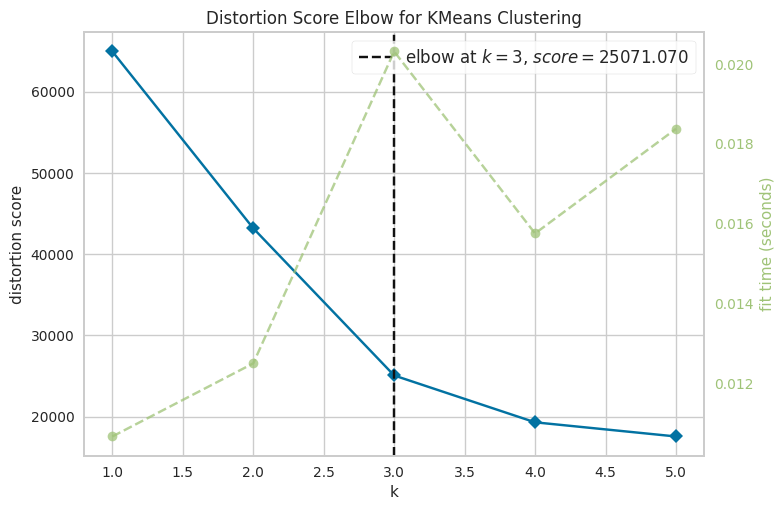

In [32]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(random_state=0), k=(1,6))
visualizer.fit(df_analysis) 
visualizer.show()
plt.show()

=== Average Silhouette Score for different number of clusters ===


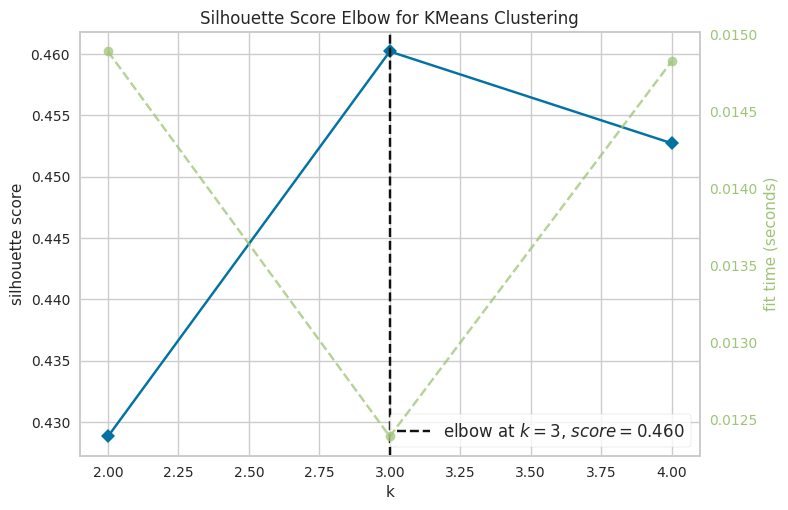



=== Silhouette plot for 2 Clusters ===


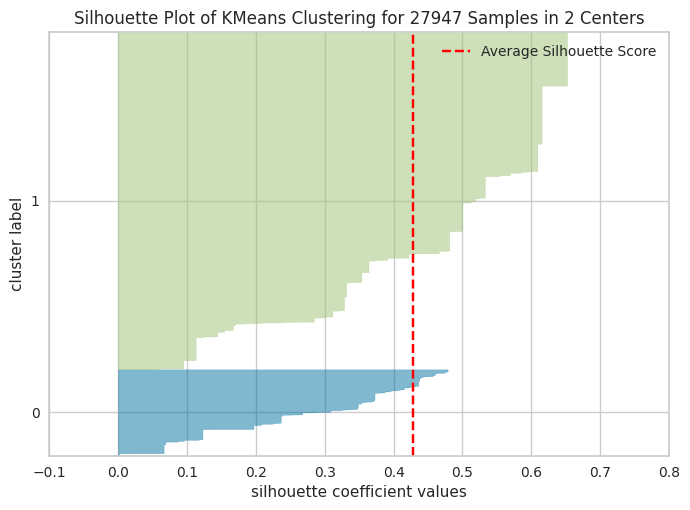



=== Silhouette plot for 3 Clusters ===


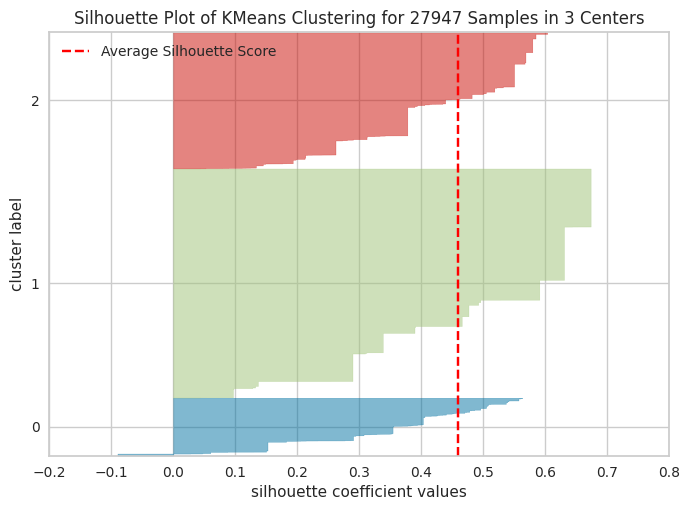



=== Silhouette plot for 4 Clusters ===


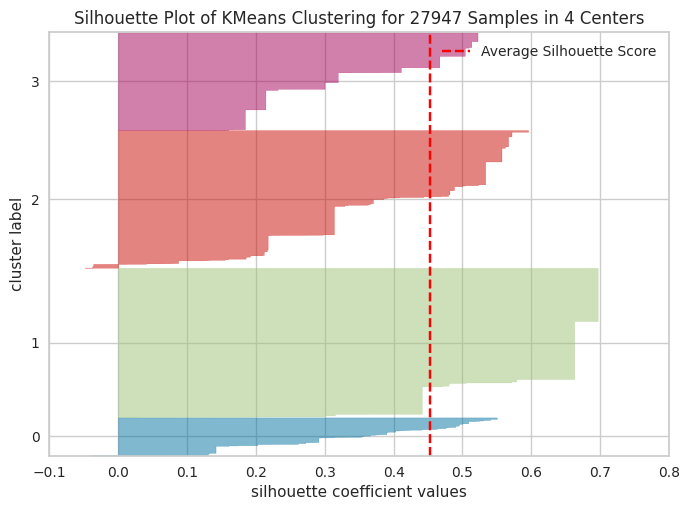

In [34]:
from yellowbrick.cluster import SilhouetteVisualizer

n_cluster_start, n_cluster_stop = 2, 5

print("=== Average Silhouette Score for different number of clusters ===")
visualizer = KElbowVisualizer(KMeans(random_state=0), k=(
    n_cluster_start, n_cluster_stop), metric='silhouette')
visualizer.fit(df_analysis)
visualizer.show()
plt.show()
print("\n")


for n_clusters in np.arange(start=n_cluster_start, stop=n_cluster_stop):

    print(f"=== Silhouette plot for {n_clusters} Clusters ===")
    visualizer = SilhouetteVisualizer(estimator=KMeans(n_clusters=n_clusters, random_state=0),
                                      colors='yellowbrick')
    visualizer.fit(df_analysis)
    visualizer.show()
    plt.show()
    print("\n")

In [39]:


def PipelineCluster():
    pipeline_base = Pipeline([

        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None, method="spearman",
                                                              threshold=0.8, selection_method="variance")),

        ("scaler", StandardScaler()),

        ("PCA", PCA(n_components=2, random_state=0)),

        ("model", KMeans(n_clusters=3, random_state=0)),

    ])
    return pipeline_base

PipelineCluster()



Pipeline(steps=[('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance')),
                ('scaler', StandardScaler()),
                ('PCA', PCA(n_components=2, random_state=0)),
                ('model', KMeans(n_clusters=3, random_state=0))])

### Fit Cluster Pipeline

Quick recap of our data for training cluster pipeline

In [40]:
X = df.copy()
print(X.shape)
X.head(3)

(27947, 6)


,appearance,service,staff,variety,price,taste
0,2,4,2,2,4,4
1,3,4,2,4,4,4
2,1,4,2,1,2,2


Fit Cluster pipeline

In [41]:
pipeline_cluster = PipelineCluster()
pipeline_cluster.fit(X)

Pipeline(steps=[('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance')),
                ('scaler', StandardScaler()),
                ('PCA', PCA(n_components=2, random_state=0)),
                ('model', KMeans(n_clusters=3, random_state=0))])

## Add cluster predictions to dataset

We add a column `"Clusters"` (with the cluster pipeline predictions) to the dataset

In [42]:
X['Clusters'] = pipeline_cluster['model'].labels_
print(X.shape)
X.head(3)

(27947, 7)


,appearance,service,staff,variety,price,taste,Clusters
0,2,4,2,2,4,4,2
1,3,4,2,4,4,4,2
2,1,4,2,1,2,2,1


* Clusters frequencies 
          proportion
Clusters            
1               0.54
2               0.32
0               0.14 




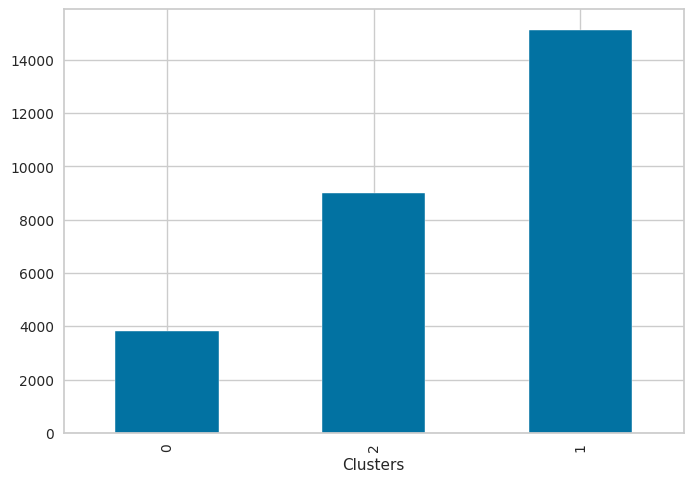

In [43]:
print(f"* Clusters frequencies \n{ X['Clusters'].value_counts(normalize=True).to_frame().round(2)} \n\n")
X['Clusters'].value_counts().sort_values().plot(kind='bar')
plt.show()

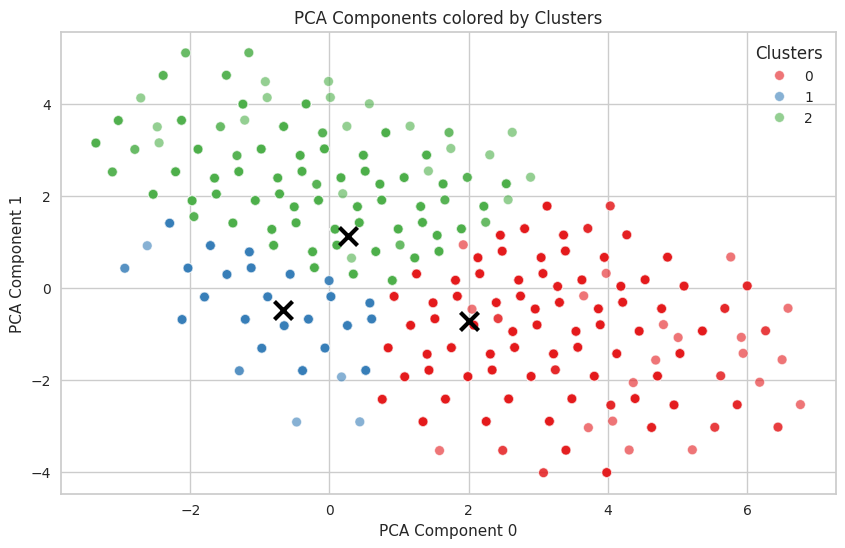

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_analysis[:, 0], y=df_analysis[:, 1],
                hue=X['Clusters'], palette='Set1', alpha=0.6)
plt.scatter(x=pipeline_cluster['model'].cluster_centers_[:, 0], y=pipeline_cluster['model'].cluster_centers_[:, 1],
            marker="x", s=169, linewidths=3, color="black")
plt.xlabel("PCA Component 0")
plt.ylabel("PCA Component 1")
plt.title("PCA Components colored by Clusters")
plt.show()

We save the cluster predictions from this pipeline to use in the future. We will get back to that in a later stage.

In [45]:
cluster_predictions_with_all_variables = X['Clusters']
cluster_predictions_with_all_variables

0        2
1        2
2        1
3        2
4        2
        ..
27942    2
27943    2
27944    1
27945    1
27946    2
Name: Clusters, Length: 27947, dtype: int32

### Fit a classifier, where the target is cluster predictions and features remaining variables

We copy X to a DataFrame df_clf

In [46]:
df_clf = X.copy()
print(df_clf.shape)
df_clf.head(3)

(27947, 7)


,appearance,service,staff,variety,price,taste,Clusters
0,2,4,2,2,4,4,2
1,3,4,2,4,4,4,2
2,1,4,2,1,2,2,1


Split Train and Test sets

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_clf.drop(['Clusters'], axis=1),
    df_clf['Clusters'],
    test_size=0.2,
    random_state=0
)

print(X_train.shape, X_test.shape)

(22357, 6) (5590, 6)


Create classifier pipeline steps

In [48]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier

def PipelineClf2ExplainClusters():
    pipeline_base = Pipeline([
        
        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None, method="spearman",
                                                              threshold=0.6, selection_method="variance")),

        ("scaler", StandardScaler()),

        ("feat_selection", SelectFromModel(
            GradientBoostingClassifier(random_state=0))),

        ("model", GradientBoostingClassifier(random_state=0)),

    ])
    return pipeline_base


PipelineClf2ExplainClusters()

Pipeline(steps=[('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6)),
                ('scaler', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=GradientBoostingClassifier(random_state=0))),
                ('model', GradientBoostingClassifier(random_state=0))])

Fit the classifier to the training data

In [49]:
pipeline_clf_cluster = PipelineClf2ExplainClusters()
pipeline_clf_cluster.fit(X_train, y_train)

Pipeline(steps=[('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6)),
                ('scaler', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=GradientBoostingClassifier(random_state=0))),
                ('model', GradientBoostingClassifier(random_state=0))])

## Evaluate classifier performance on Train and Test Sets

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_train, pipeline_clf_cluster.predict(X_train)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3098
           1       0.79      0.97      0.87     12041
           2       0.77      0.80      0.79      7218

    accuracy                           0.78     22357
   macro avg       0.52      0.59      0.55     22357
weighted avg       0.68      0.78      0.72     22357



/home/cistudent/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cistudent/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cistudent/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
print(classification_report(y_test, pipeline_clf_cluster.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       726
           1       0.81      0.97      0.88      3096
           2       0.78      0.82      0.80      1768

    accuracy                           0.80      5590
   macro avg       0.53      0.60      0.56      5590
weighted avg       0.69      0.80      0.74      5590



/home/cistudent/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cistudent/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cistudent/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Assess the most important Features that define a cluster

In [54]:
data_cleaning_feat_eng_steps = 2
columns_after_data_cleaning_feat_eng = (Pipeline(pipeline_clf_cluster.steps[:data_cleaning_feat_eng_steps])
                                        .transform(X_train)
                                        .columns)

best_features = columns_after_data_cleaning_feat_eng[pipeline_clf_cluster['feat_selection'].get_support(
)].to_list()


df_feature_importance = (pd.DataFrame(data={
    'Feature': columns_after_data_cleaning_feat_eng[pipeline_clf_cluster['feat_selection'].get_support()],
    'Importance': pipeline_clf_cluster['model'].feature_importances_})
    .sort_values(by='Importance', ascending=False)
)


best_features = df_feature_importance['Feature'].to_list()

print(f"* These are the {len(best_features)} most important features in descending order. "
      f"The model was trained on them: \n{best_features} \n")
df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'